In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset Description

In [ ]:
df_review = pd.read_excel("/content/drive/MyDrive/imdb dataset.xlsx")
df_review

,Movie Name,Year of Release,Watch Time,Movie Rating,Description,Genre,Reviews,Sentiments
0,The Dark Knight,2008,152 min,9.0,When the menace known as the Joker wreaks havo...,"Action,Adventure",Totally one of the greatest movie titles ever ...,positive
1,The Lord of the Rings: The Return of the King,2003,201 min,9.0,Gandalf and Aragorn lead the World of Men agai...,"Fantasy,Fiction",The best trilogy in the history of cinema,positive
2,Jai Bhim,2021,164 min,8.9,When a tribal man is arrested for a case of al...,"Legal drama,Mystery",Brilliant movie\n,positive
3,Inception,2010,148 min,8.8,A thief who steals corporate secrets through t...,"Action,Sci-fi",A one-of-a-kind mind-blowing masterpiece!,positive
4,The Lord of the Rings: The Two Towers,2002,179 min,8.8,While Frodo and Sam edge closer to Mordor with...,"Fantasy,Fiction",A True Fantasy Movie,positive
...,...,...,...,...,...,...,...,...
1495,Bhala Thandanana,2022,134 min,6.6,NaN,Drama,Excellent movie - well worth watching,positive
1496,Dhaai Akshar Prem Ke,2000,167 min,3.7,An international terrorist is hired to ass...,"Drama, Romance",A complete mess,negative
1497,Gaon,2018,124 min,5.4,During the Mamangam festival held at the banks...,Drama,worth your time,positive
1498,Nazar,2005,138 min,7.9,Journey through the lives of Bangalore's taxi...,Thriller,A Story Well Told,positive


In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movie Name       1500 non-null   object 
 1   Year of Release  1499 non-null   object 
 2   Watch Time       1403 non-null   object 
 3   Movie Rating     1500 non-null   float64
 4   Description      1442 non-null   object 
 5   Genre            1475 non-null   object 
 6   Reviews          1439 non-null   object 
 7   Sentiments       1500 non-null   object 
dtypes: float64(1), object(7)
memory usage: 93.9+ KB


In [ ]:
df_review.describe()

,Movie Rating
count,1500.000000
mean,7.019400
std,1.487893
min,1.500000
25%,6.300000
50%,7.600000
75%,8.000000
max,9.900000


# Data Visualization
*Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.*

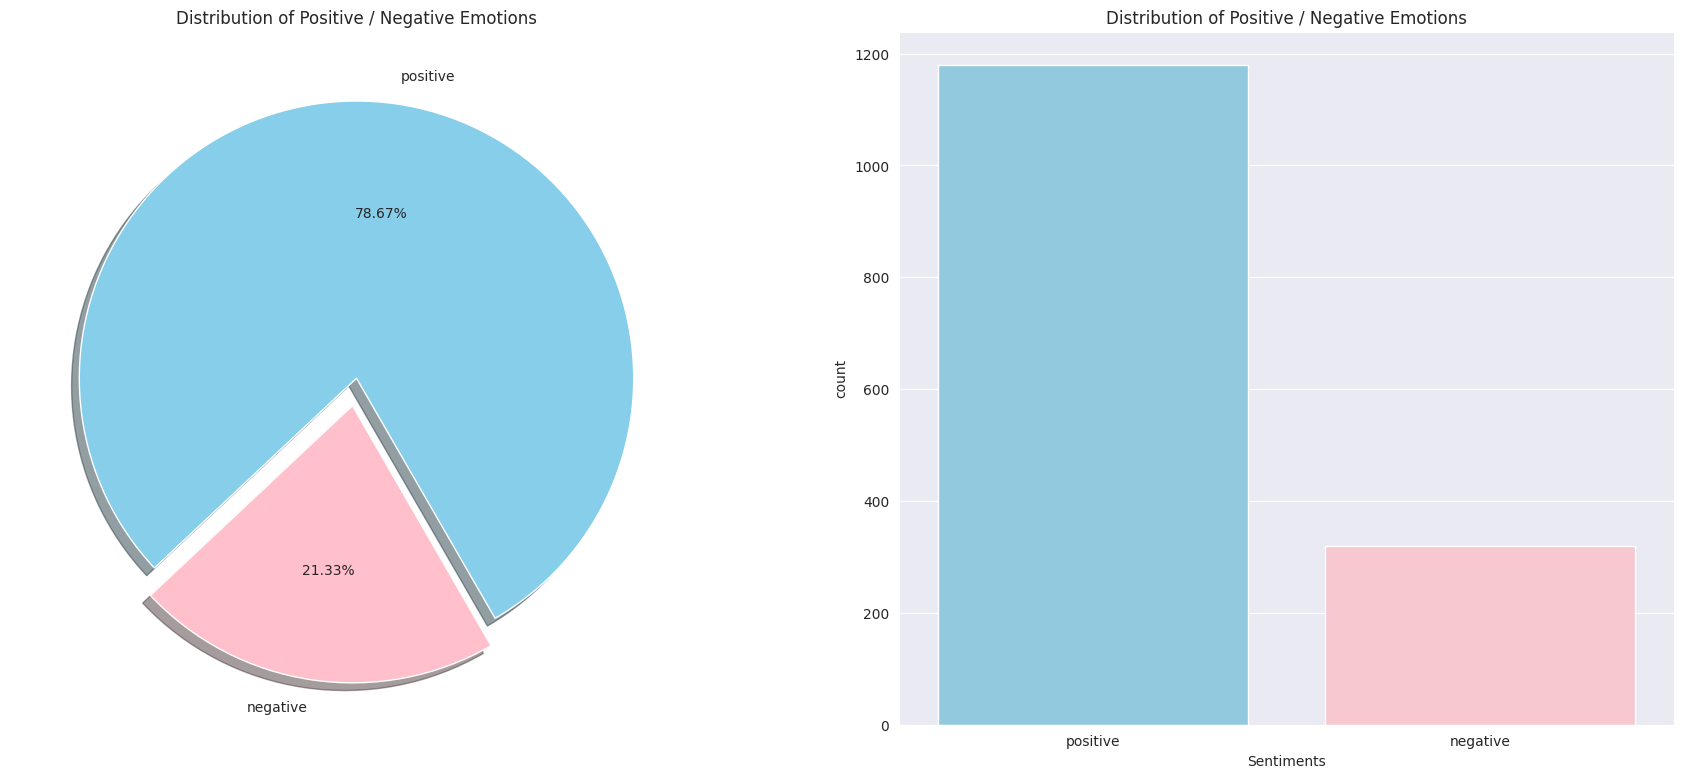

In [ ]:
a , ax = plt.subplots(1,2,figsize=(22,9))
df_review['Sentiments'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax[0],shadow=True, startangle=300, colors = ["skyblue", "pink"])
ax[0].set_title('Distribution of Positive / Negative Emotions')
ax[0].set_ylabel('')
sns.countplot(data = df_review ,x='Sentiments',ax=ax[1], palette=["skyblue", "pink"])
ax[1].set_title('Distribution of Positive / Negative Emotions')
plt.show()

In [ ]:
print(df_review.shape)

(1500, 8)


**ANALYSING AND VISUALIZING**

**Top 10 movies per user rating**

In [ ]:
top_per_ur = df_review[['Movie Name', 'Movie Rating']].sort_values('Movie Rating', ascending = False).head(10)


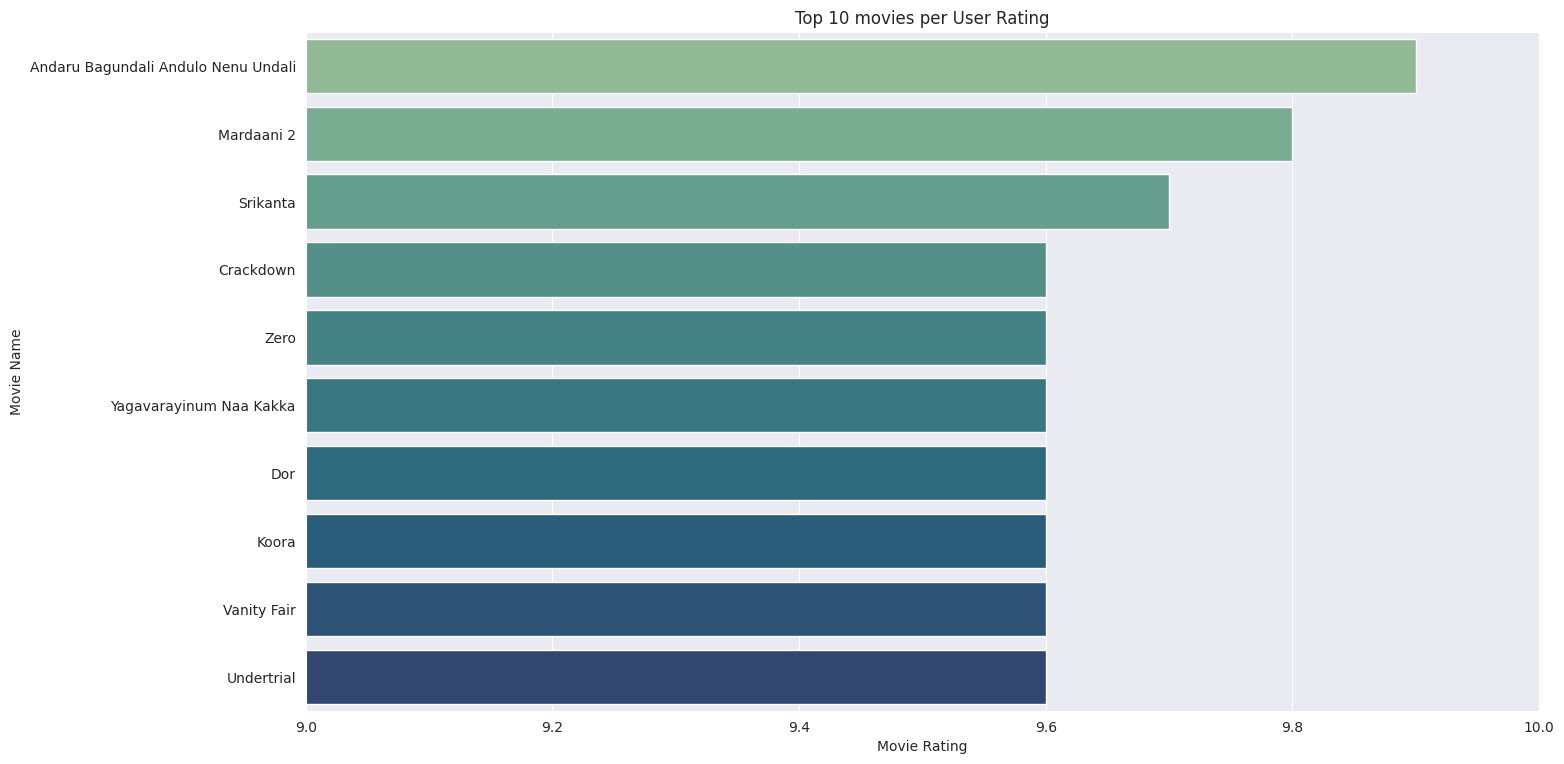

In [ ]:
fig,ax1 = plt.subplots(1,1, figsize = (16,8))


ax1.set_title('Top 10 movies per User Rating')
ax1.set_xlim(9, 10)
sns.barplot(x = 'Movie Rating', y = 'Movie Name', data = top_per_ur, ax = ax1, palette = 'crest');

plt.tight_layout(pad= 2)

**WORST 10 MOVIES PER USER RATINGS**

In [ ]:
worst_per_ur = df_review[['Movie Name', 'Movie Rating']].sort_values('Movie Rating', ascending = True).head(10)

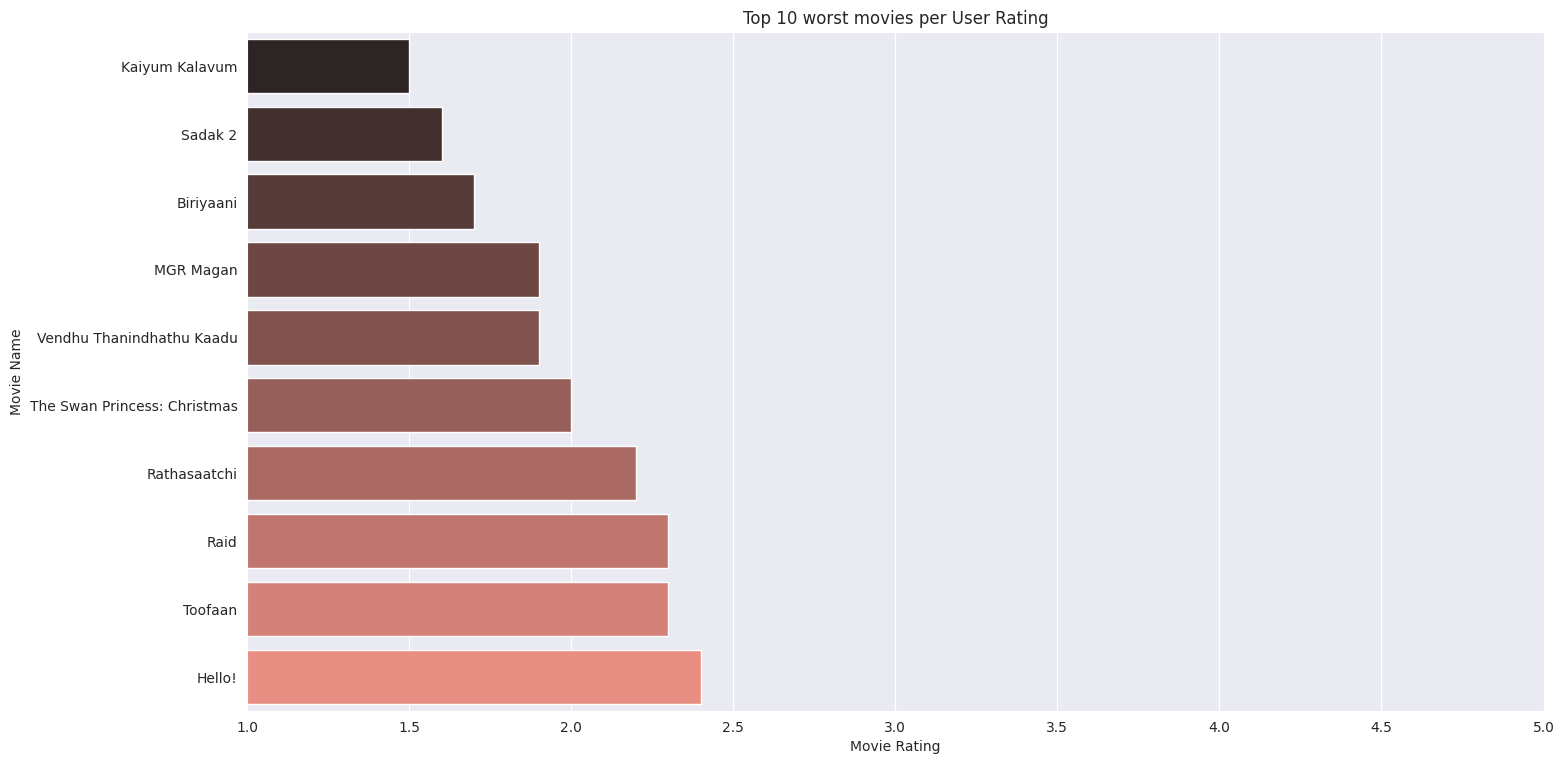

In [ ]:
fig,ax2 = plt.subplots(1,1, figsize = (16,8))


ax2.set_title('Top 10 worst movies per User Rating')
ax2.set_xlim(1,5)
sns.barplot(x = 'Movie Rating', y = 'Movie Name', data = worst_per_ur, ax = ax2, palette = 'dark:salmon');

plt.tight_layout(pad= 2)

**From which year are the most movies in IMDb's top 250**

In [ ]:
best_years = df_review.groupby('Year of Release')['Movie Name'].count().sort_values(ascending = False).head(10)

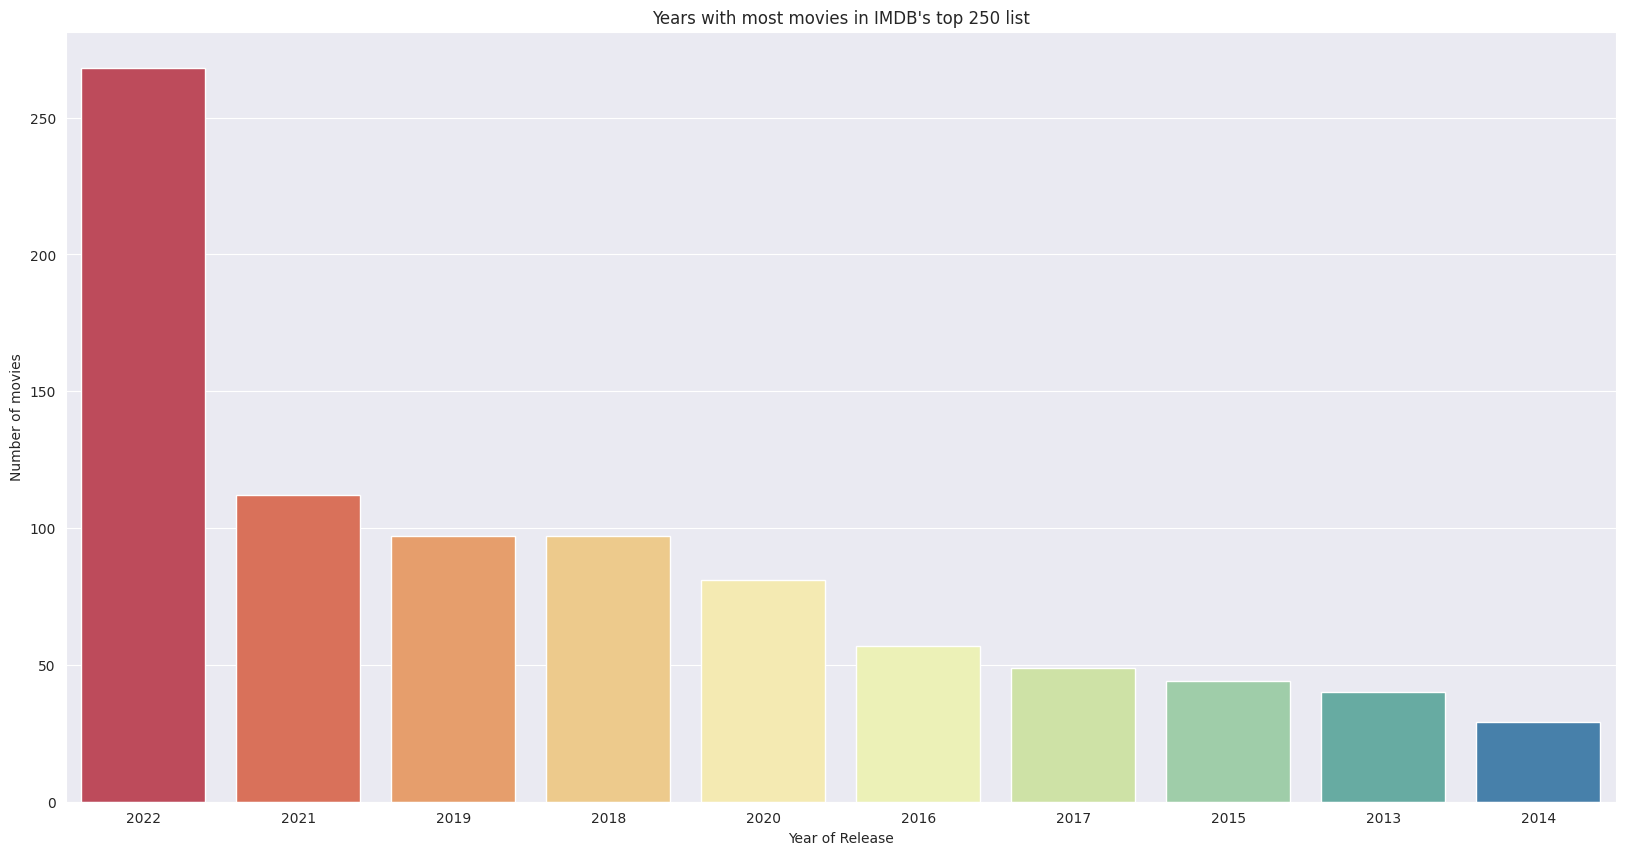

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x = best_years.index , y=best_years, order = best_years.index, palette = 'Spectral' );

plt.title("Years with most movies in IMDB's top 250 list")
plt.ylabel('Number of movies');

**Most movies by genre in IMDB's top 250**

In [ ]:
most_by_genre =  df_review.groupby('Genre')['Movie Name'].count().sort_values(ascending = False).head(10)

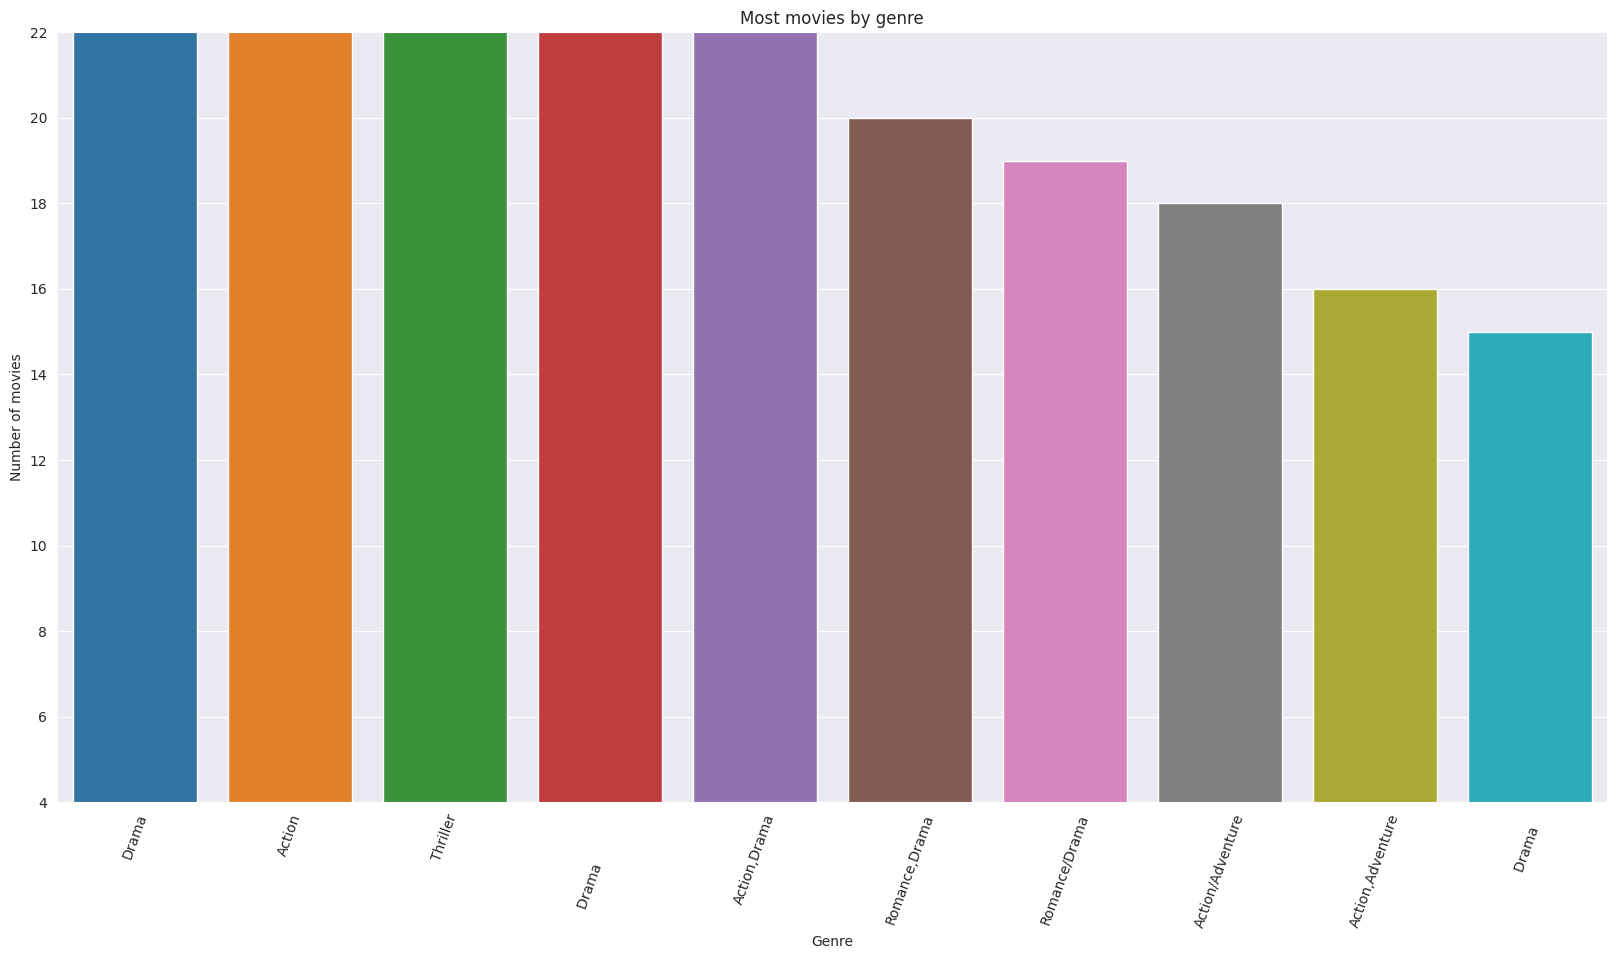

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x = most_by_genre.index, y = most_by_genre)
plt.title('Most movies by genre')
plt.ylabel('Number of movies')
plt.xticks(rotation = 70)
plt.ylim(4,22);

<Axes: xlabel='Movie Rating', ylabel='Count'>

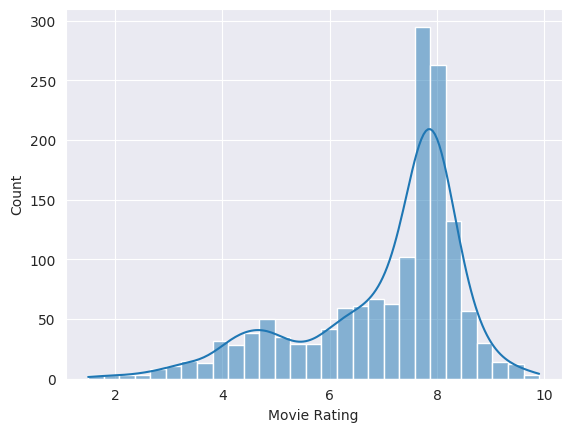

In [ ]:
sns.histplot(data=df_review, x="Movie Rating", kde=True)

In [ ]:
import plotly.express as px
ax = px.histogram(df_review,x="Watch Time",marginal="box",title="Total Time")
ax.update_layout(bargap=0.2)

**WORDCLOUD**

*Word clouds are popular for visualizing qualitative data because they’re simple to use and provide quick insights at a glance.
it's important to remember that while word clouds are useful for visualizing common words in a text or data set, they're usually only useful as a high-level overview of themes. They're similar to bar blots but are often more visually appealing (albeit at times harder to interpret). Word clouds can be particularly helpful when you want to:*

    **Quickly identify the most important themes or topics in a large body of text
    **Understand the overall sentiment or tone of a piece of writing
    **Explore patterns or trends in data that contain textual information
    **Communicate the key ideas or concepts in a visually engaging way
*However, it's important to keep in mind that word clouds don't provide any context or deeper understanding of the words and phrases being used. Therefore, they should be used in conjunction with other methods for analyzing and interpreting text data.*

In [ ]:
from sklearn.preprocessing import LabelEncoder
sentences=df_review['Reviews']
le=LabelEncoder()
df_review['Sentiments']= le.fit_transform(df_review['Sentiments'])

**GENERATING POSITIVE WORDS**

(-0.5, 799.5, 799.5, -0.5)

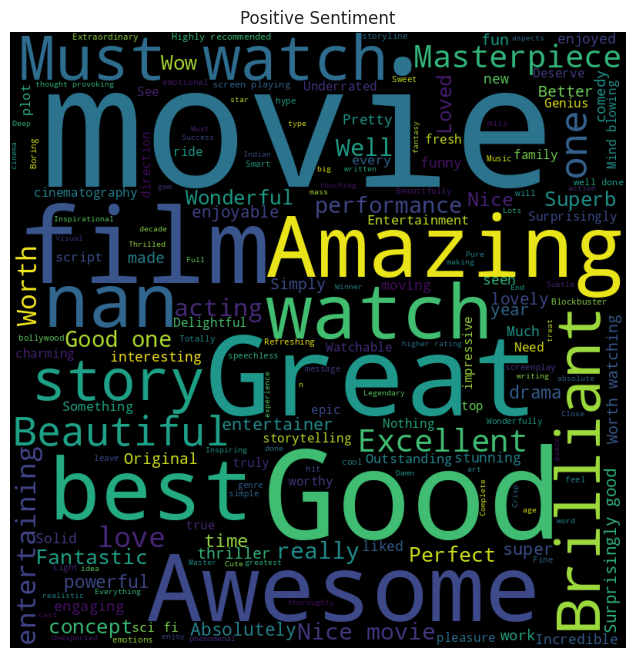

In [ ]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)

pos=' '.join(map(str,sentences[df_review['Sentiments']==1]))
neg=' '.join(map(str,sentences[df_review['Sentiments']==0]))

wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(pos)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.title('Positive Sentiment')
plt.axis('off')

**GENERATING NEGATIVE WORDS**

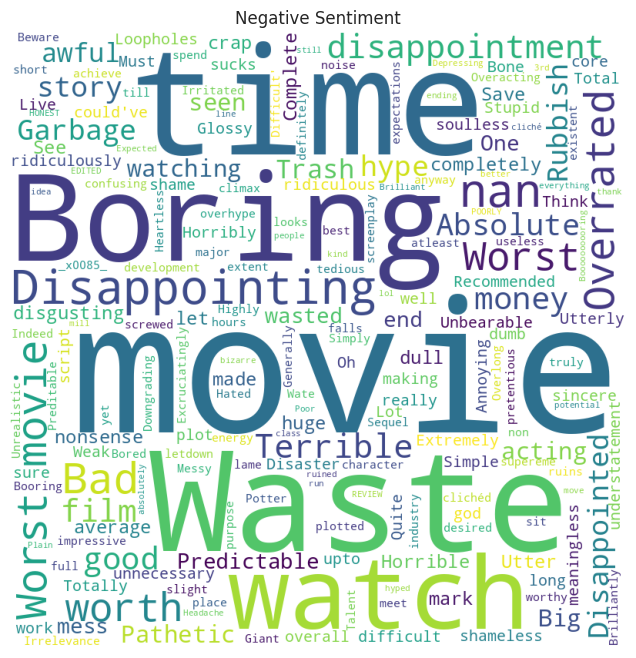

In [ ]:
plt.figure(figsize=(8,8))
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(neg)

plt.imshow(wordcloud2)
plt.title('Negative Sentiment')
plt.axis('off')

plt.show()

**Data cleaning**

In [ ]:
df_review.isna().any()

Movie Name         False
Year of Release     True
Watch Time          True
Movie Rating       False
Description         True
Genre               True
Reviews             True
Sentiments         False
dtype: bool

In [ ]:
df_review.isna().sum()

Movie Name          0
Year of Release     1
Watch Time         97
Movie Rating        0
Description        58
Genre              25
Reviews            61
Sentiments          0
dtype: int64

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from tqdm.auto import tqdm
import time

In [ ]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', str(text))
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower())
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
%%time

tqdm.pandas()

df_review['cleaned_text'] = df_review['Reviews'].progress_apply(clean_text)

  0%|          | 0/1500 [00:00<?, ?it/s]

CPU times: user 803 ms, sys: 75.3 ms, total: 879 ms
Wall time: 901 ms


Train and Test Sets

In [ ]:
df_review.Sentiments.value_counts()

1    1180
0     320
Name: Sentiments, dtype: int64

In [ ]:
reviews=df_review['Reviews']
sentiment=df_review['Sentiments']

In [ ]:
print('Classes::\n',np.unique(sentiment))

Classes::
 [0 1]


In [ ]:
train_x=reviews[:375]
train_y=sentiment[:357]
test_x=reviews[375:]
test_y=sentiment[375:]

In [ ]:
#Shape of train & test dataset
print('Shape of train dataset::',train_x.shape, train_y.shape)
print('Shape of test dataset::',test_x.shape, test_y.shape)

Shape of train dataset:: (375,) (357,)
Shape of test dataset:: (1125,) (1125,)


In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_review,test_size =0.33,random_state=42)

In [ ]:
train_x, train_y = (train['Reviews'].values.astype('U')), (train['Sentiments'].values.astype('U'))
test_x, test_y = (test['Reviews'].values.astype('U')), (test['Sentiments'].values.astype('U'))

In [ ]:
train_y

array(['1', '1', '1', ..., '1', '1', '1'], dtype='<U21')

**Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [ ]:
train_x_vector = tfidf.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x)

**SVC ALGORITHM**

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [ ]:
print(svc.predict(tfidf.transform(['A bad movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all I gave this movie away'])))

['0']
['1']
['0']


In [ ]:
print("Accuracy of training data is:",svc.score(train_x_vector, train_y))
print("Accuracy of testing data is:",svc.score(test_x_vector, test_y))

Accuracy of training data is: 0.9681592039800995
Accuracy of testing data is: 0.9414141414141414


**CONFUSION MATRIX FOR SVC**

In [ ]:
pred1 = svc.predict(test_x_vector)
pred1[:5]

array(['1', '1', '1', '1', '1'], dtype='<U21')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_y, pred1, target_names = ['Bad Reviews','Good Reviews']))

              precision    recall  f1-score   support

 Bad Reviews       0.93      0.72      0.81        87
Good Reviews       0.94      0.99      0.97       408

    accuracy                           0.94       495
   macro avg       0.94      0.86      0.89       495
weighted avg       0.94      0.94      0.94       495



In [ ]:
cm1 = confusion_matrix(test_y,pred1)
cm1

array([[ 63,  24],
       [  5, 403]])

Text(33.222222222222214, 0.5, 'Actual')

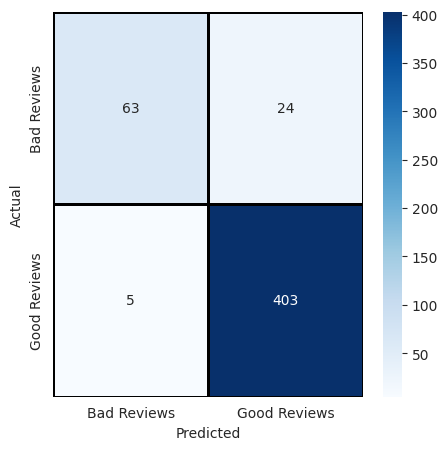

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(cm1,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Bad Reviews','Good Reviews'] , yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

**DECISION TREE ALGORITHM**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)
print("Accuracy of training data is:",dec_tree.score(train_x_vector, train_y))
print("Accuracy of testing data is:",dec_tree.score(test_x_vector, test_y))

Accuracy of training data is: 0.9850746268656716
Accuracy of testing data is: 0.9252525252525252


**CONFUSION MATRIX FOR DECISION TREE**

In [ ]:
pred2 = dec_tree.predict(test_x_vector)
pred2[:5]

array(['1', '1', '1', '1', '1'], dtype='<U21')

In [ ]:
print(classification_report(test_y, pred2, target_names = ['Bad Reviews','Good Reviews']))

              precision    recall  f1-score   support

 Bad Reviews       0.82      0.74      0.78        87
Good Reviews       0.94      0.97      0.96       408

    accuracy                           0.93       495
   macro avg       0.88      0.85      0.87       495
weighted avg       0.92      0.93      0.92       495



In [ ]:
cm2 = confusion_matrix(test_y,pred2)
cm2

array([[ 64,  23],
       [ 14, 394]])

Text(33.222222222222214, 0.5, 'Actual')

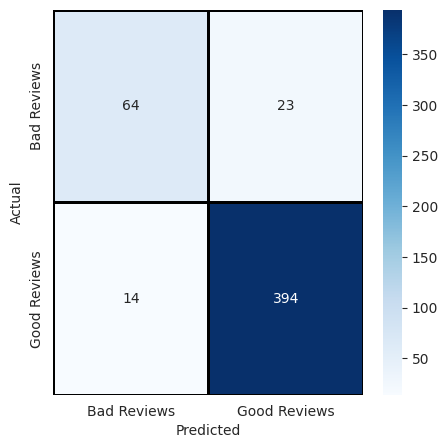

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(cm2,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Bad Reviews','Good Reviews'] , yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

**GAUSSIAN NAIVE BAYES ALGORITHM**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)
print("Accuracy of training data is:",gnb.score(train_x_vector.toarray(), train_y))
print("Accuracy of testing data is:",gnb.score(test_x_vector.toarray(), test_y))

Accuracy of training data is: 0.7930348258706468
Accuracy of testing data is: 0.6363636363636364


**CONFUSION MATRIX FOR GAUSSIAN NAIVE BAYES**

In [ ]:
pred3 = gnb.predict(test_x_vector.toarray())
pred3[:5]

array(['1', '0', '1', '0', '1'], dtype='<U1')

In [ ]:
print(classification_report(test_y, pred3, target_names = ['Bad Reviews','Good Reviews']))

              precision    recall  f1-score   support

 Bad Reviews       0.31      0.86      0.45        87
Good Reviews       0.95      0.59      0.73       408

    accuracy                           0.64       495
   macro avg       0.63      0.73      0.59       495
weighted avg       0.84      0.64      0.68       495



In [ ]:
cm3 = confusion_matrix(test_y,pred3)
cm3

array([[ 75,  12],
       [168, 240]])

Text(33.222222222222214, 0.5, 'Actual')

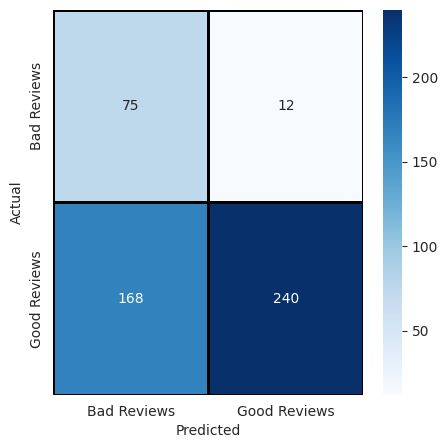

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(cm3,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Bad Reviews','Good Reviews'] , yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

**LOGISTIC REGRESSION ALGORITHM**

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector,train_y)
print("Accuracy of training data is:",log_reg.score(train_x_vector,train_y))
print("Accuracy of testing data is:",log_reg.score(test_x_vector, test_y))

Accuracy of training data is: 0.8875621890547264
Accuracy of testing data is: 0.9090909090909091


**CONFUSION MATRIX FOR LOGISTIC REGRESSION**

In [ ]:
pred4 = log_reg.predict(test_x_vector)
pred4[:5]

array(['1', '1', '1', '1', '1'], dtype='<U21')

In [ ]:
print(classification_report(test_y, pred4, target_names = ['Bad Reviews','Good Reviews']))

              precision    recall  f1-score   support

 Bad Reviews       0.92      0.53      0.67        87
Good Reviews       0.91      0.99      0.95       408

    accuracy                           0.91       495
   macro avg       0.91      0.76      0.81       495
weighted avg       0.91      0.91      0.90       495



In [ ]:
cm4 = confusion_matrix(test_y,pred4)
cm4

array([[ 46,  41],
       [  4, 404]])

Text(33.222222222222214, 0.5, 'Actual')

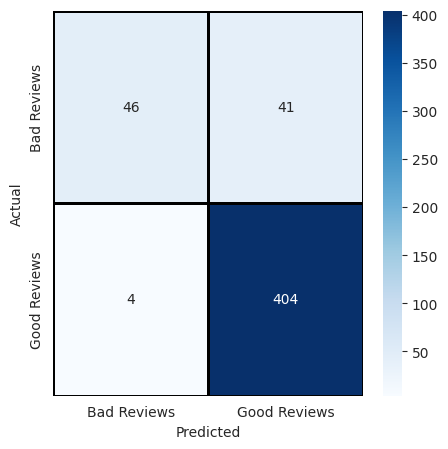

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(cm4,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Bad Reviews','Good Reviews'] , yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")